<a href="https://colab.research.google.com/github/Ishika1512/Restaurant-Revenue-Prediction---Regression/blob/main/Restaurant_Revenue_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir('/content/drive/MyDrive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly as py

In [ ]:
train = pd.read_csv('Train.csv',sep = ',')

In [ ]:
test = pd.read_csv('Test.csv',sep = ',')

In [ ]:
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV)
from sklearn.metrics import (mean_squared_error, mean_absolute_error)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold


from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,LogisticRegression
print('Library Loaded')


Library Loaded


In [ ]:
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [ ]:
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [ ]:
train.dtypes

Id              int64
Open Date      object
City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
revenue       float64
dtype: object

In [ ]:
test.dtypes

Id              int64
Open Date      object
City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
dtype: object

In [ ]:
train.isnull().sum(),test.isnull().sum()

(Id            0
 Open Date     0
 City          0
 City Group    0
 Type          0
 P1            0
 P2            0
 P3            0
 P4            0
 P5            0
 P6            0
 P7            0
 P8            0
 P9            0
 P10           0
 P11           0
 P12           0
 P13           0
 P14           0
 P15           0
 P16           0
 P17           0
 P18           0
 P19           0
 P20           0
 P21           0
 P22           0
 P23           0
 P24           0
 P25           0
 P26           0
 P27           0
 P28           0
 P29           0
 P30           0
 P31           0
 P32           0
 P33           0
 P34           0
 P35           0
 P36           0
 P37           0
 revenue       0
 dtype: int64,
 Id            0
 Open Date     0
 City          0
 City Group    0
 Type          0
 P1            0
 P2            0
 P3            0
 P4            0
 P5            0
 P6            0
 P7            0
 P8            0
 P9            0
 P10           0

In [ ]:
test.isnull().sum(),test.isnull().sum()

(Id            0
 Open Date     0
 City          0
 City Group    0
 Type          0
 P1            0
 P2            0
 P3            0
 P4            0
 P5            0
 P6            0
 P7            0
 P8            0
 P9            0
 P10           0
 P11           0
 P12           0
 P13           0
 P14           0
 P15           0
 P16           0
 P17           0
 P18           0
 P19           0
 P20           0
 P21           0
 P22           0
 P23           0
 P24           0
 P25           0
 P26           0
 P27           0
 P28           0
 P29           0
 P30           0
 P31           0
 P32           0
 P33           0
 P34           0
 P35           0
 P36           0
 P37           0
 dtype: int64,
 Id            0
 Open Date     0
 City          0
 City Group    0
 Type          0
 P1            0
 P2            0
 P3            0
 P4            0
 P5            0
 P6            0
 P7            0
 P8            0
 P9            0
 P10           0
 P11           0

In [ ]:
cat_feature = [col for col in train.columns if train[col].dtypes == "O"]
cat_feature

['Open Date', 'City', 'City Group', 'Type']

In [ ]:
num_feature = [col for col in train.columns if train[col].dtypes != "O"]
num_feature

['Id',
 'P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'P9',
 'P10',
 'P11',
 'P12',
 'P13',
 'P14',
 'P15',
 'P16',
 'P17',
 'P18',
 'P19',
 'P20',
 'P21',
 'P22',
 'P23',
 'P24',
 'P25',
 'P26',
 'P27',
 'P28',
 'P29',
 'P30',
 'P31',
 'P32',
 'P33',
 'P34',
 'P35',
 'P36',
 'P37',
 'revenue']

In [ ]:
train.isna().any().any()

False

In [ ]:
test.isna().any().any()

False

<ipython-input-25-38e615349637>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.revenue, bins=20, kde=False,color='purple')


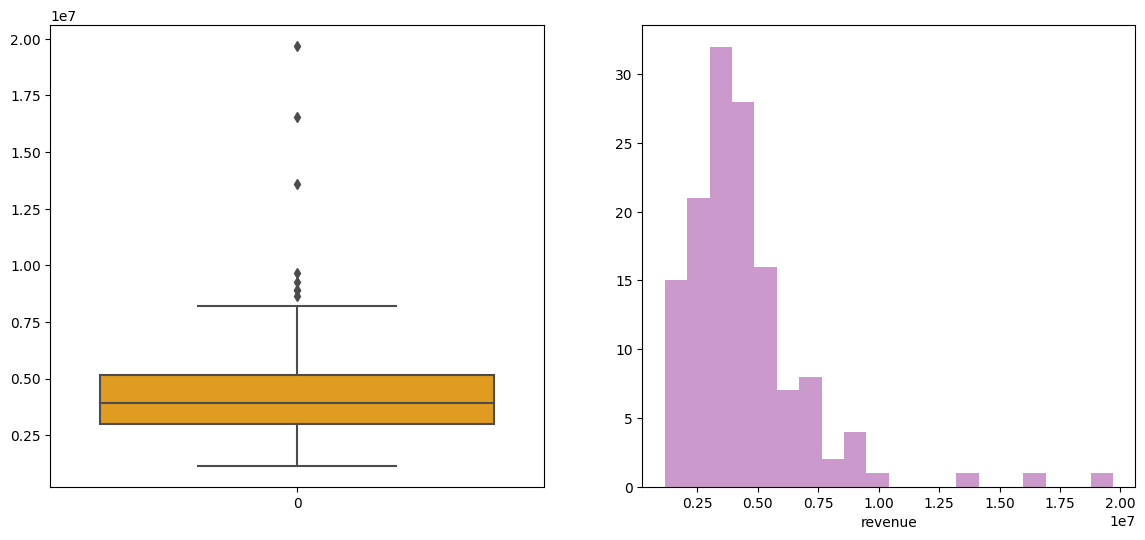

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(train.revenue,color='orange')
plt.subplot(1,2,2)
sns.distplot(train.revenue, bins=20, kde=False,color='purple')
plt.show()

In [ ]:
train['revenue'].describe()

count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64

[Text(0.5, 1.0, 'Box Plot for Revenue variable')]

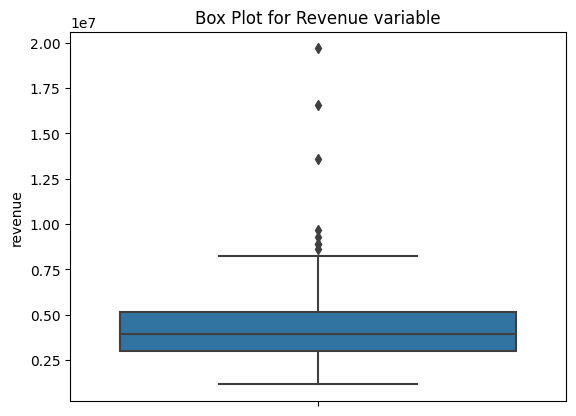

In [ ]:
sns.boxplot(y = train['revenue']).set(title="Box Plot for Revenue variable")

<ipython-input-28-2cec9a7ca308>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(train['revenue'])


Text(0.5, 1.0, 'Distribution plot for revenue')

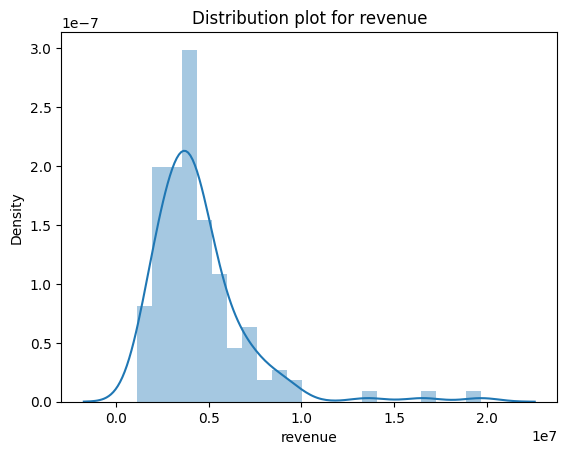

In [ ]:
ax = sns.distplot(train['revenue'])
ax.set_title("Distribution plot for revenue")

From the above plot it is clear that we experience skewness in the target variable.
We can observe that 'revenue' variable is right skewed/positively skewed. This skewness caused due to outliers. These outliers appeared might be due to a few retaurants really having higher revenue or mistakenly choosen values. We can apply some transformations to the variable which decreases the effect of outliers

Training set :
FC    76
IL    60
DT     1
Name: Type, dtype: int64
-------------
Testing set :
FC    57019
IL    40447
DT     2244
MB      290
Name: Type, dtype: int64


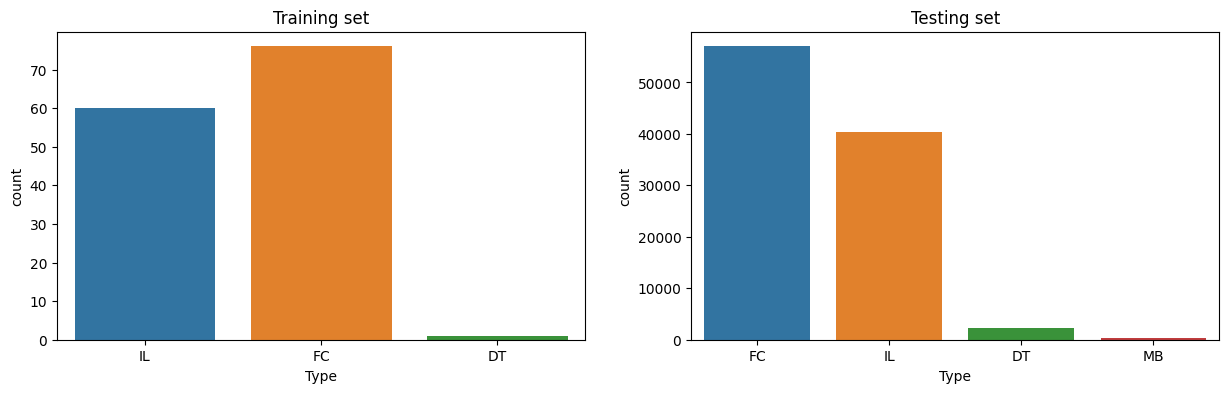

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,4))
sns.countplot(x=train['Type'],ax=ax[0]).set_title("Training set")
print("Training set :")
print(train['Type'].value_counts())

sns.countplot(x=test['Type'],ax=ax[1]).set_title("Testing set")
print("-------------")
print("Testing set :")
print(test['Type'].value_counts())

The above plots representS the count of different types of restaurants in training and testing datasets.
Since the count of 'DT'(drive-thru) &, 'MB'(mobile) is very less, which indicates these two are the less preferred type of restaurants where 'FC'(Food Court) is the most preferred type of restaurant.
Note: There is no single occurrence of 'MB' (mobile restaurants) in the training dataset.

In [ ]:
(train['Type'].unique(), test['Type'].unique())

(array(['IL', 'FC', 'DT'], dtype=object),
 array(['FC', 'IL', 'DT', 'MB'], dtype=object))

In [ ]:
(train['Type'].nunique(), test['Type'].nunique())

(3, 4)

The MB Type will be replaced with the DT Type in the test set since it's not available in our training set.


In [ ]:
test.loc[test['Type']=='MB', 'Type'] = 'DT'

In [ ]:
(train['Type'].nunique(), test['Type'].nunique())

(3, 3)

Training set :
Big Cities    78
Other         59
Name: City Group, dtype: int64
-------------
Testing set :
Other         50728
Big Cities    49272
Name: City Group, dtype: int64


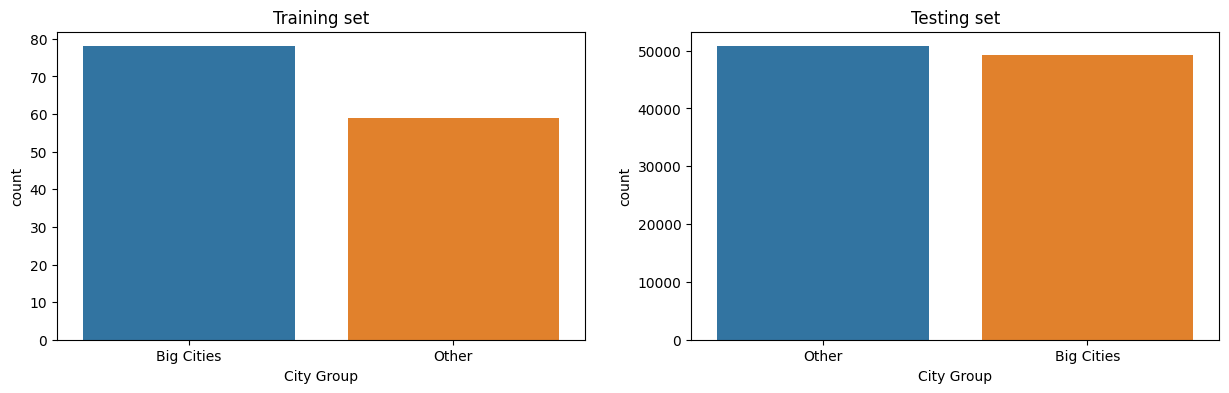

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,4))
sns.countplot(x=train['City Group'],ax=ax[0]).set_title("Training set")
print("Training set :")
print(train['City Group'].value_counts())

sns.countplot(x=test['City Group'],ax=ax[1]).set_title("Testing set")
print("-------------")
print("Testing set :")
print(test['City Group'].value_counts())

The above plots describe the count of the 'City Group' feature in training and testing datasets.
Here 'Big Cities' are slightly more than 'Other' in the training phase. But that shouldn't be a problem during modeling.

Text(0.5, 1.0, 'Countplot for City - Testing set')

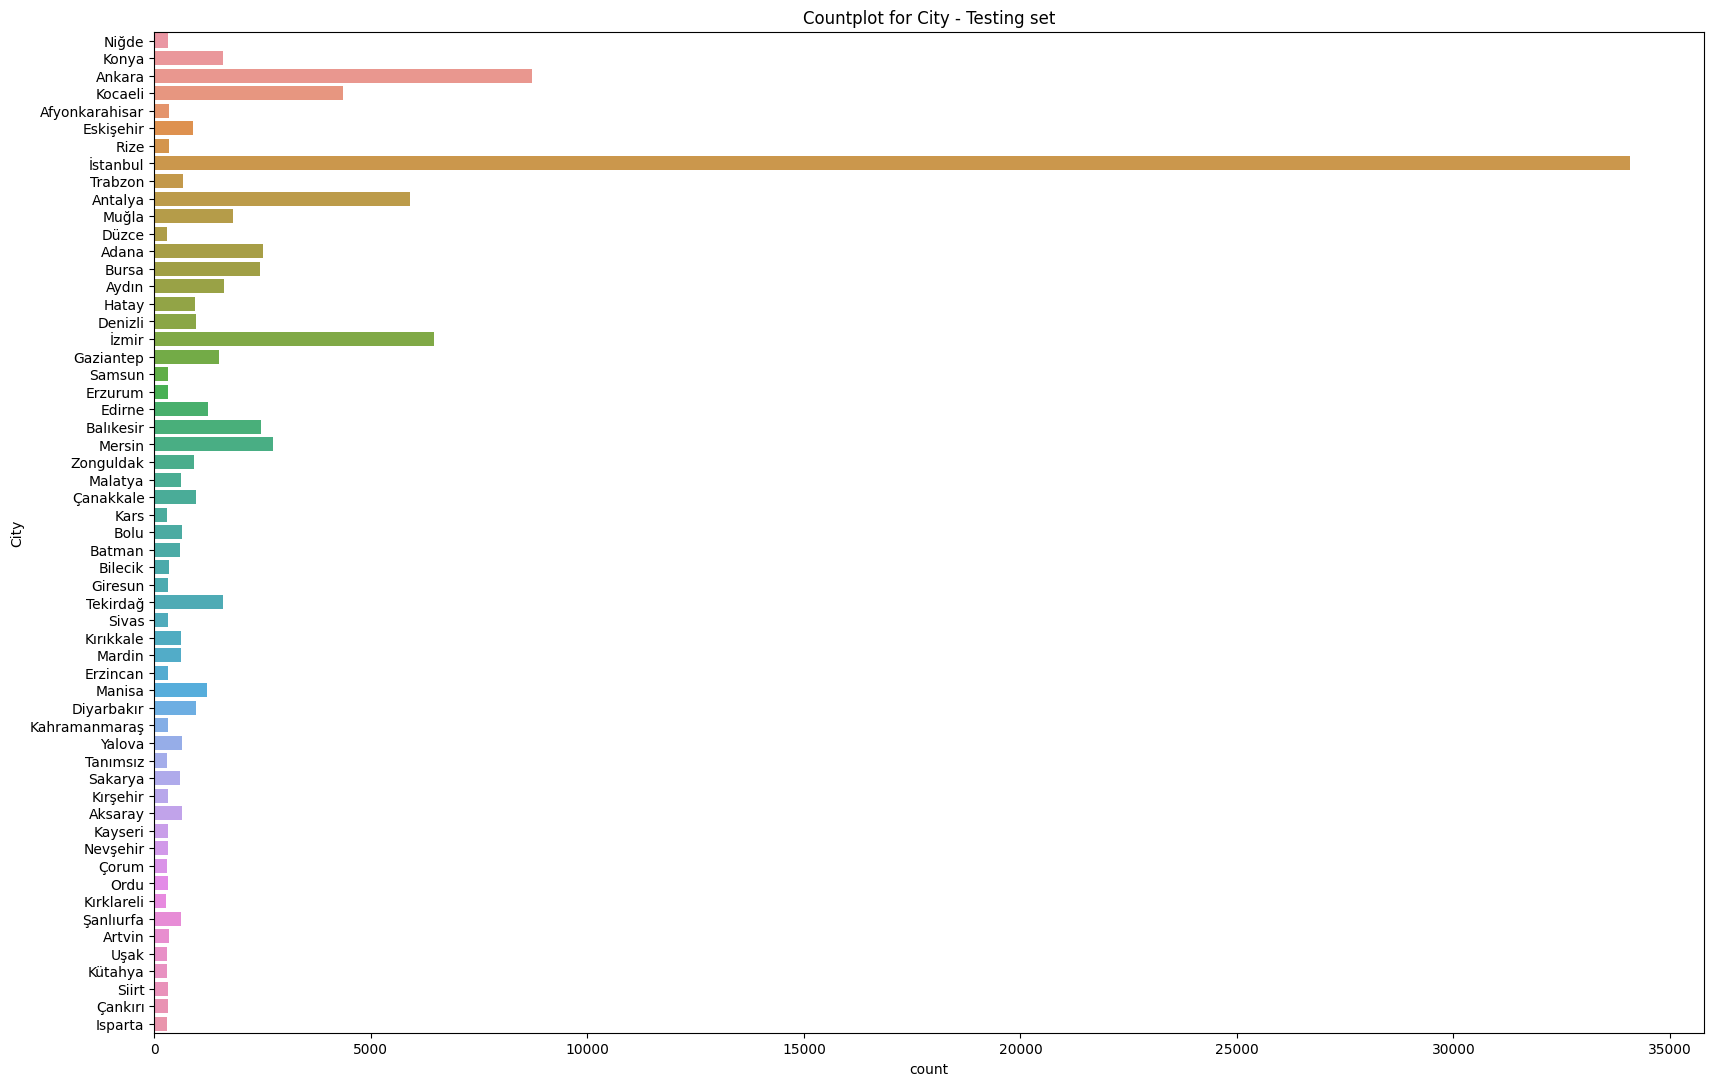

In [ ]:
plt.figure(figsize=(20,13))
sns.countplot(y=test['City']).set_title("Countplot for City - Testing set")

From the above count plots of 'City' feature, it appears that most of them prefer to open a new restaurant in cities like Istanbul, Ankara, Izmir.


[Text(0.5, 1.0, 'City Group vs Revenue')]

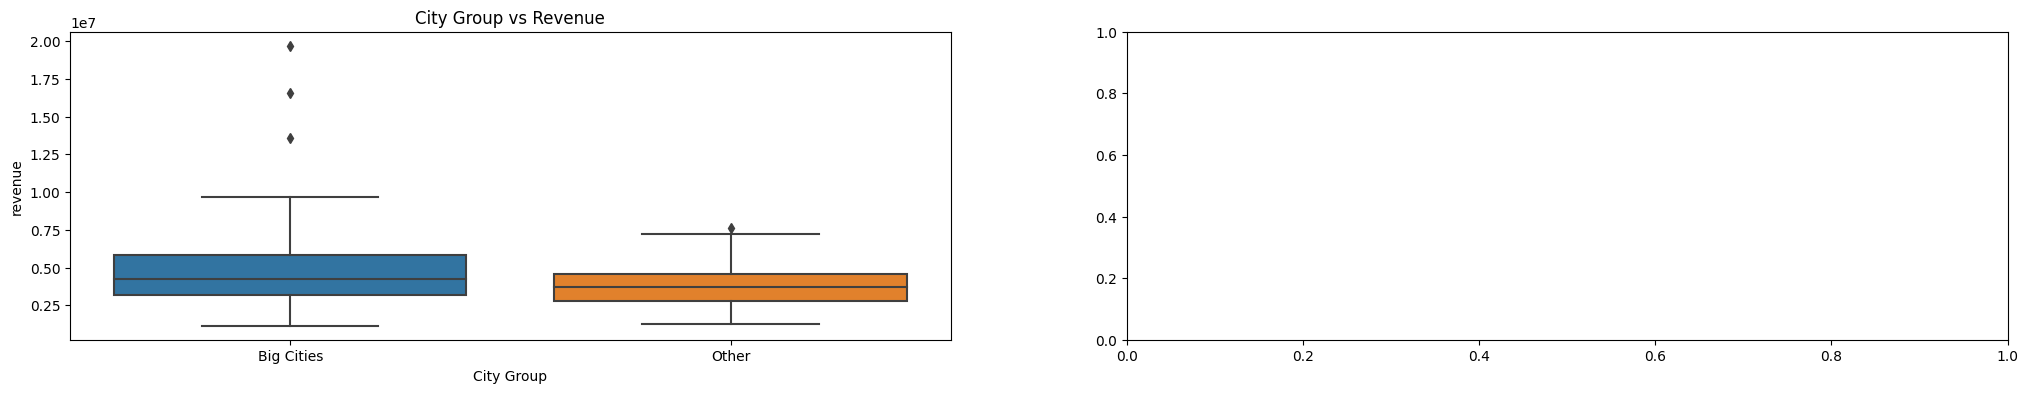

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(25,4))
sns.boxplot(y=train['revenue'],x=train['City Group'],ax=ax[0]).set(title='City Group vs Revenue')

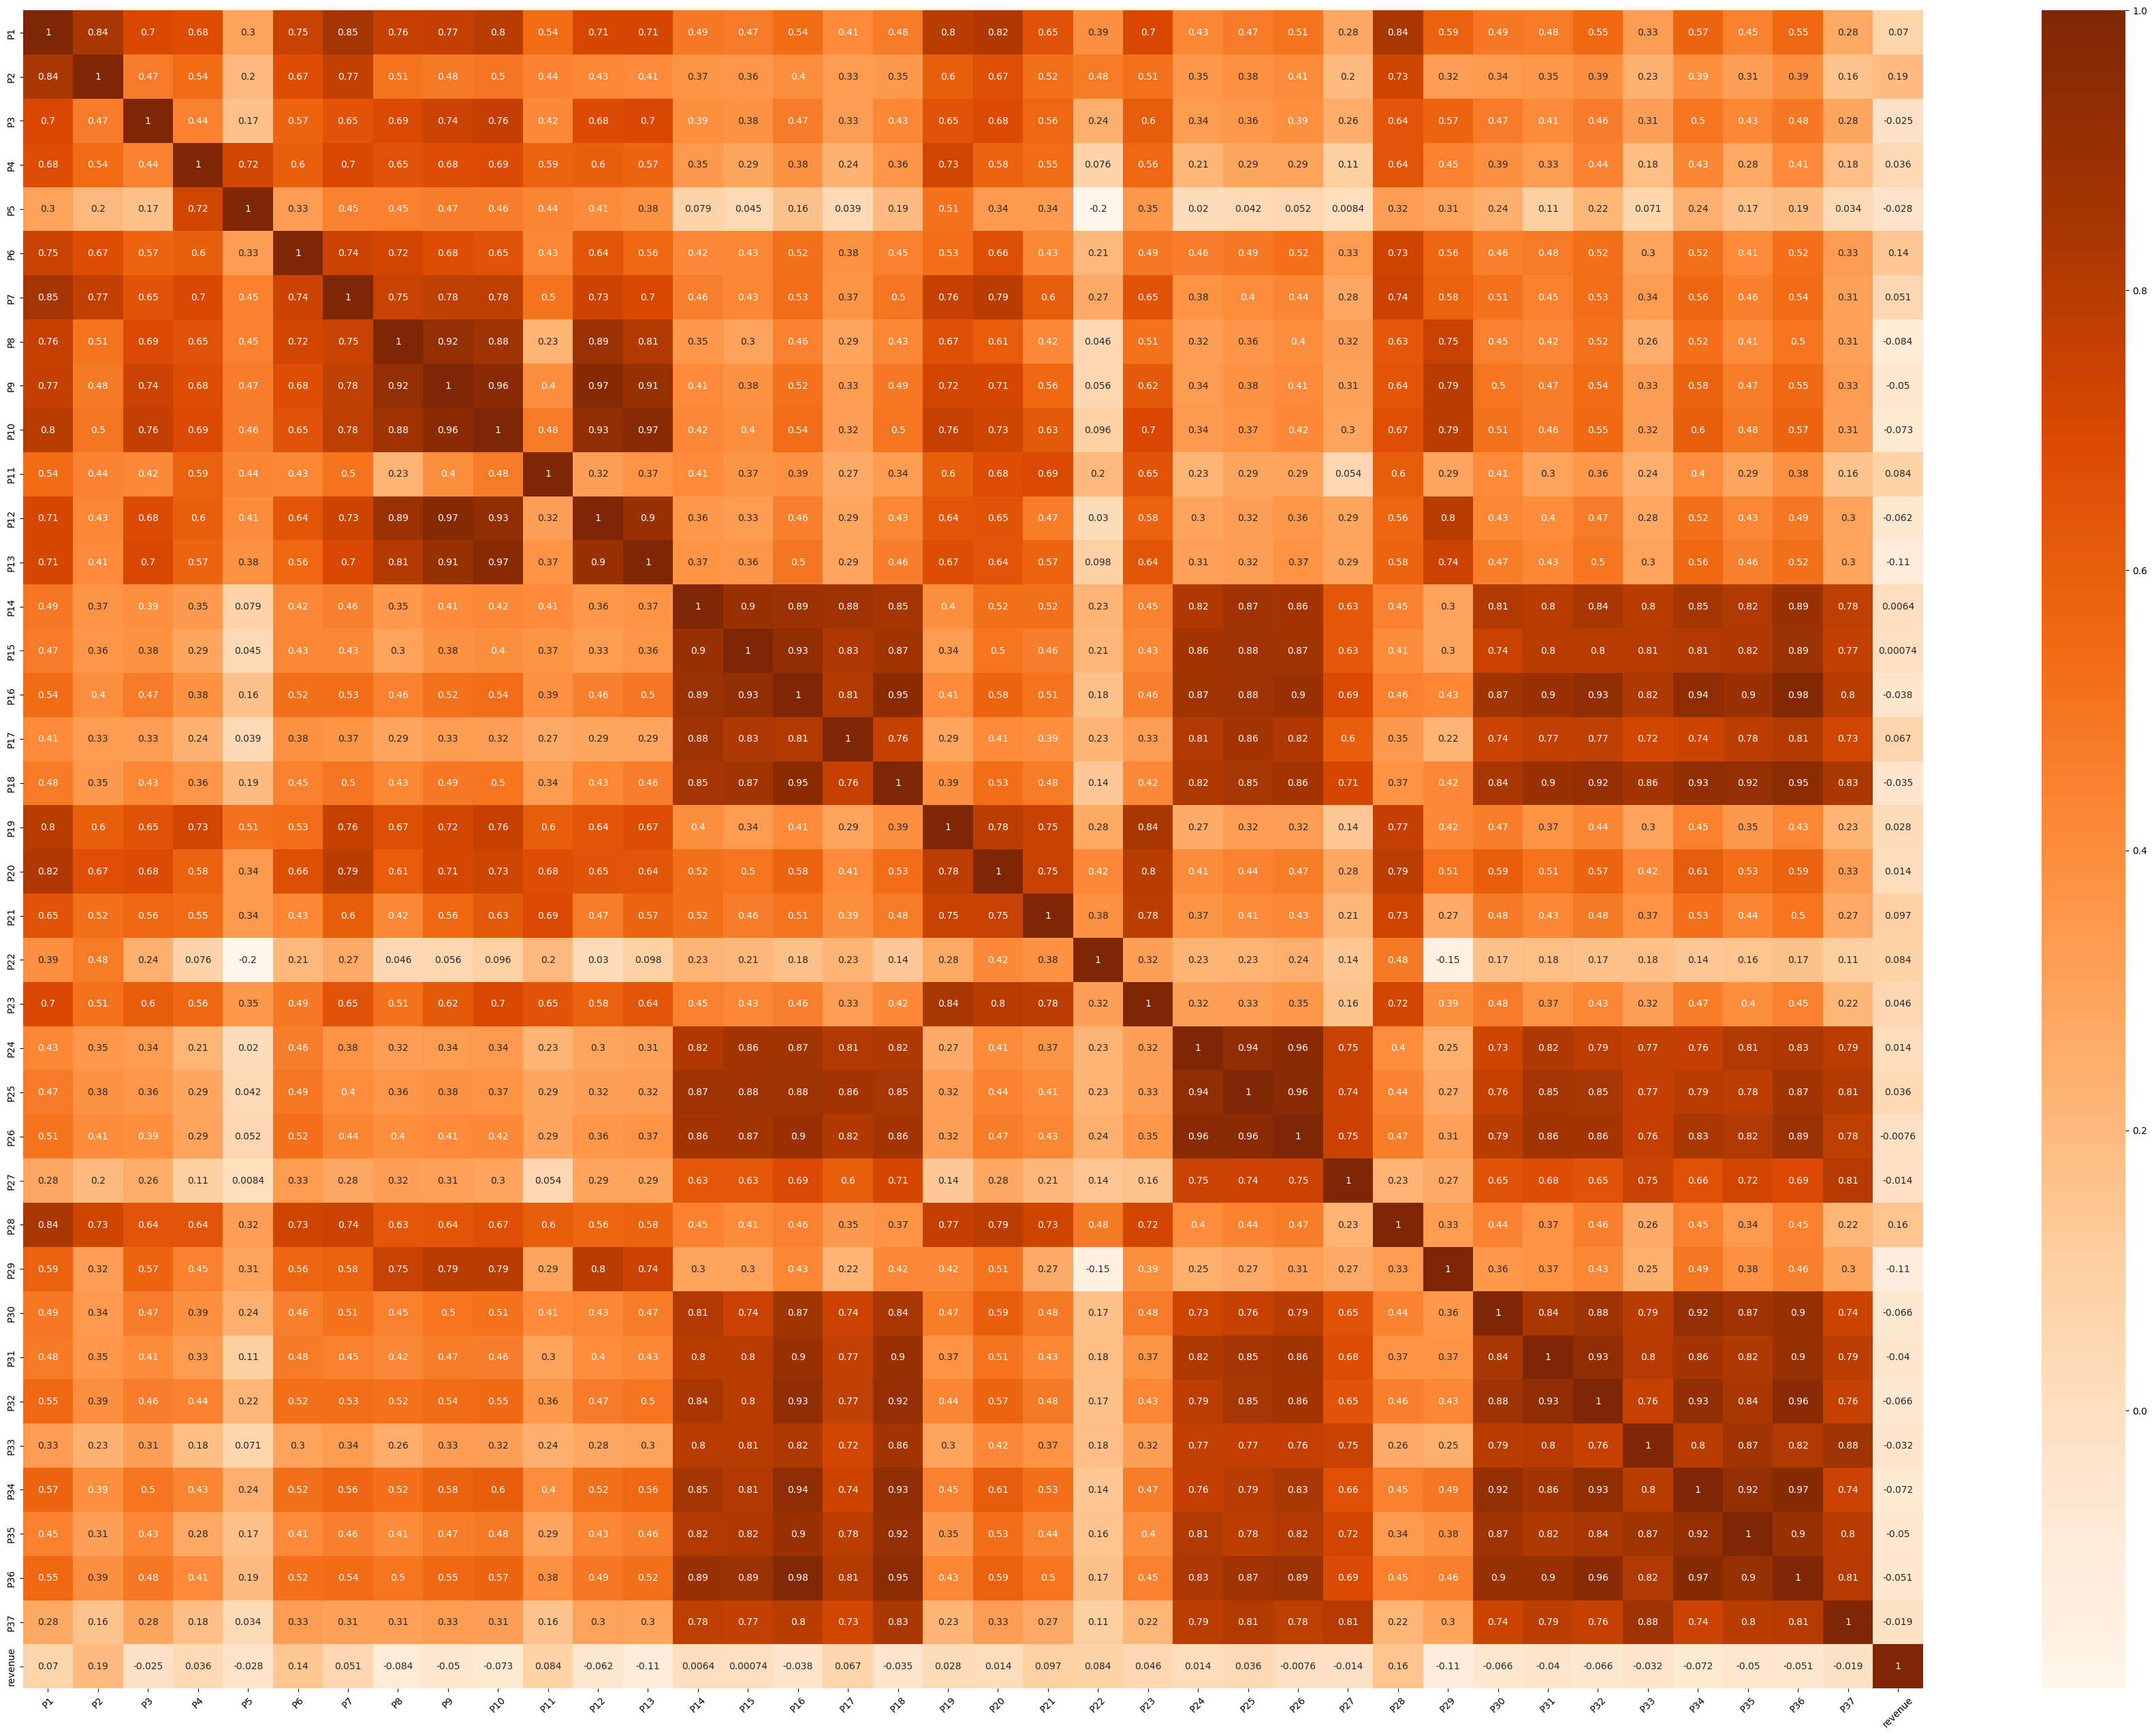

In [ ]:
fig=plt.figure(figsize=(45,32))
features=(train.loc[:,'P1':'P37']).columns.tolist()
sns.heatmap(train[features+['revenue']].corr(),cmap='Oranges',annot=True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
import datetime
train.drop('Id',axis=1,inplace=True)
train['Open Date']  = pd.to_datetime(train['Open Date'])
test['Open Date']  = pd.to_datetime(test['Open Date'])
launch_date = datetime.datetime(2015, 3, 23)
# scale days open
train['Days Open'] = (launch_date - train['Open Date']).dt.days / 1000
test['Days Open'] = (launch_date - test['Open Date']).dt.days / 1000
train.drop('Open Date', axis=1, inplace=True)
test.drop('Open Date', axis=1, inplace=True)

In [ ]:
train.columns

Index(['City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
       'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17',
       'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27',
       'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37',
       'revenue', 'Days Open'],
      dtype='object')

In [ ]:
train.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Days Open
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,5,3,4,5,5,4,3,4,5653753.0,5.728
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,0,6923131.0,2.594
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,0,0,2055379.0,0.744
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,25,12,10,6,18,12,12,6,2675511.0,1.145
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,5,1,3,2,3,4,3,3,4316715.0,2.144


City can be dropped because there are 23 cities in test that are unseen during training phase

In [ ]:
train.drop('City', axis=1, inplace=True)
test.drop('City', axis=1, inplace=True)

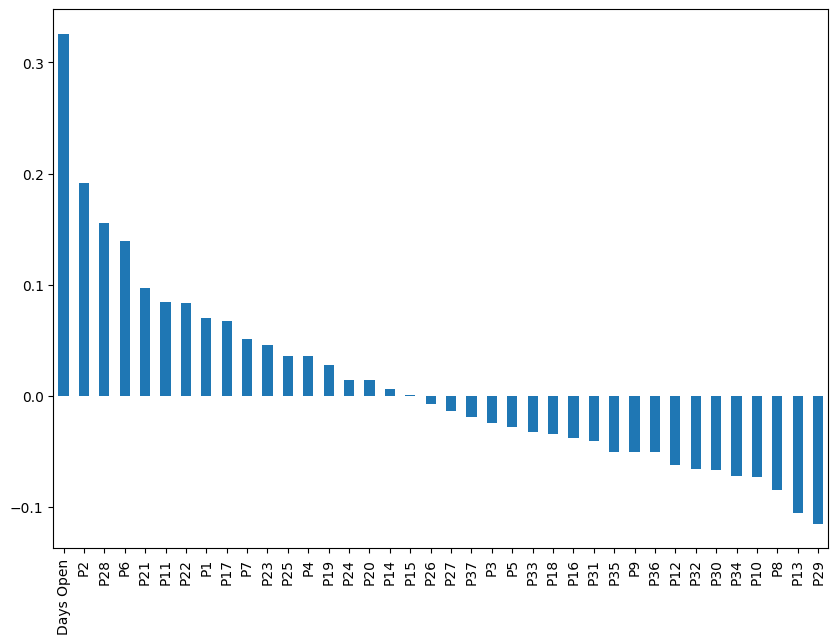

In [ ]:
corr_with_revenue = train.drop(['City Group','Type'],axis=1).corr()['revenue'].sort_values(ascending=False)
plt.figure(figsize=(10,7))
corr_with_revenue.drop('revenue').plot.bar()
plt.show()

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_train = IterativeImputer(max_iter=30, missing_values=0, sample_posterior=True, min_value=1, random_state=37)
imp_test = IterativeImputer(max_iter=30, missing_values=0, sample_posterior=True, min_value=1, random_state=23)

p_data = ['P'+str(i) for i in range(1,38)]
train[p_data] = np.round(imp_train.fit_transform(train[p_data]))
test[p_data] = np.round(imp_test.fit_transform(test[p_data]))

In [ ]:
columnsToEncode = train.select_dtypes(include=[object]).columns
train = pd.get_dummies(train, columns=columnsToEncode, drop_first=False)
test = pd.get_dummies(test, columns=columnsToEncode, drop_first=False)

In [ ]:
train['revenue'] = np.log1p(train['revenue'])
X, y = train.drop('revenue', axis=1), train['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=118)

#KNN REGRESSOR

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

params_knn = {
    'n_neighbors' : [3, 5, 7, 9, 11],
}

knn_model = KNeighborsRegressor()
knn_regressor = GridSearchCV(knn_model, params_knn, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)
knn_regressor.fit(X_train, y_train)
print(f'Optimal neighbors: {knn_regressor.best_params_["n_neighbors"]}')
print(f'Best score: {knn_regressor.best_score_}')

Optimal neighbors: 11
Best score: -0.43011660772832583


In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=knn_regressor.best_params_["n_neighbors"])
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_pred = knn_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -7.188173431615837
Test r2 score:  0.1434305705894996
Train RMSE: 0.4071
Test RMSE: 0.5115


#RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor

params_rf = {
    'max_depth': [10, 30, 35, 50, 65, 75, 100],
    'max_features': [.3, .4, .5, .6],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [30, 50, 100, 200]
}

rf = RandomForestRegressor()
rf_regressor = GridSearchCV(rf, params_rf, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
rf_regressor.fit(X_train, y_train)
print(f'Optimal depth: {rf_regressor.best_params_["max_depth"]}')
print(f'Optimal max_features: {rf_regressor.best_params_["max_features"]}')
print(f'Optimal min_sample_leaf: {rf_regressor.best_params_["min_samples_leaf"]}')
print(f'Optimal min_samples_split: {rf_regressor.best_params_["min_samples_split"]}')
print(f'Optimal n_estimators: {rf_regressor.best_params_["n_estimators"]}')
print(f'Best score: {rf_regressor.best_score_}')

Optimal depth: 10
Optimal max_features: 0.5
Optimal min_sample_leaf: 5
Optimal min_samples_split: 8
Optimal n_estimators: 50
Best score: -0.40084556186021053


In [ ]:
rf_model = RandomForestRegressor(max_depth=rf_regressor.best_params_["max_depth"],
                                 max_features=rf_regressor.best_params_["max_features"],
                                 min_samples_leaf=rf_regressor.best_params_["min_samples_leaf"],
                                 min_samples_split=rf_regressor.best_params_["min_samples_split"],
                                 n_estimators=rf_regressor.best_params_["n_estimators"],
                                 n_jobs=-1, oob_score=True)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -0.6909628288822851
Test r2 score:  0.23543982878779202
Train RMSE: 0.2869
Test RMSE: 0.4833


42 features with reduction of 2.33%


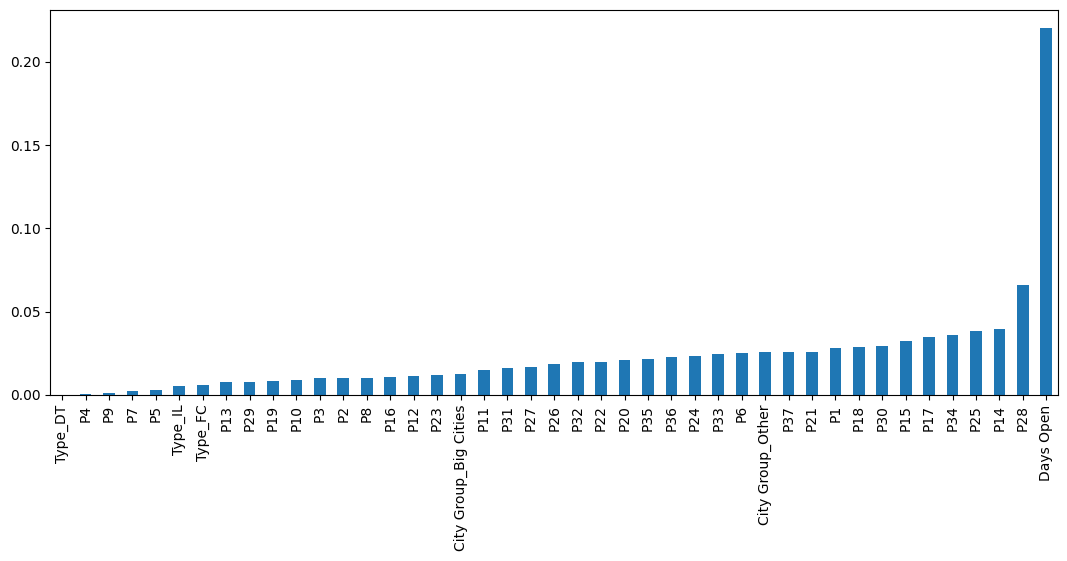

In [ ]:
rf_feature_importance = pd.Series(index = X_train.columns, data = np.abs(rf_model.feature_importances_))
n_features = (rf_feature_importance>0).sum()
print(f'{n_features} features with reduction of {(1-n_features/len(rf_feature_importance))*100:2.2f}%')
rf_feature_importance.sort_values().plot(kind = 'bar', figsize = (13,5));

In summary, the model performs poorly on the training data, as indicated by the negative R2 value. While it performs better on the test data, it still doesn't explain a significant portion of the variance in Revenue Generated. Additionally, the RMSE values, while indicating some level of accuracy, are relatively high, suggesting that the model's predictions have a notable margin of error. It may be worth exploring different modeling approaches, feature engineering, or more data to improve the model's performance.






THE BETTER OPTION OR MODEL PERFORMANCE IS IN ANOTHER COLAB NOTEBOOK NAMED: THE BETTER MODEL